In [1]:
import perceval as pcvl
from perceval.polyquantique.algorithm.BasicStateJitter import BasicStateJitter,Source
from perceval.polyquantique.algorithm.ProcessorJitter import ProcessorJitter
from perceval.polyquantique.algorithm.DistributionEnvelope import Schmidt
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 
import itertools

### Create base vector

In [33]:
source = Source(["Dirac",1],["Exponential",1/0.055],temps = [-2,5])
state = "|1,0,0,1>"
of0 = np.linspace(-0.5,1,4)
of0 = np.array([0,0,0,0.5])
bv = BasicStateJitter(state,offset=of0,source=source)

### Print vector input and new base

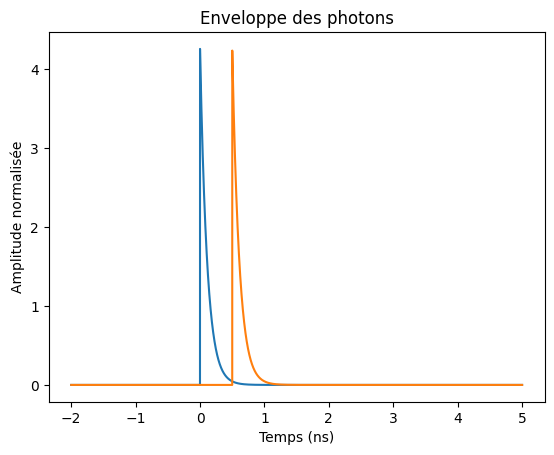

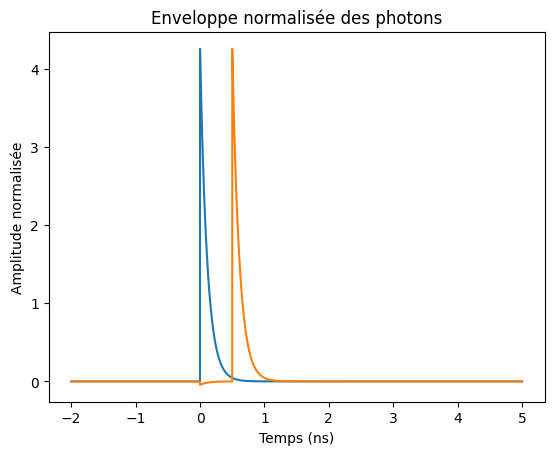

In [34]:
bv.print_vect()

### Coefficient matrix

In [4]:
print(bv.coef_matrix)

[[ 1.00227216e+00  0.00000000e+00]
 [ 1.00227216e+00 -1.93126765e-14]]


### States used and coefficient associated

In [5]:
print(bv.coef_list )
print(bv.bs_vector)

[1.00911965e+00 3.74676333e-28 0.00000000e+00 0.00000000e+00]
[[(0, 1, 1, 0), (0, 0, 0, 0)], [(0, 1, 0, 0), (0, 0, 1, 0)], [(0, 0, 1, 0), (0, 1, 0, 0)], [(0, 0, 0, 0), (0, 1, 1, 0)]]


### Create HOM circuit

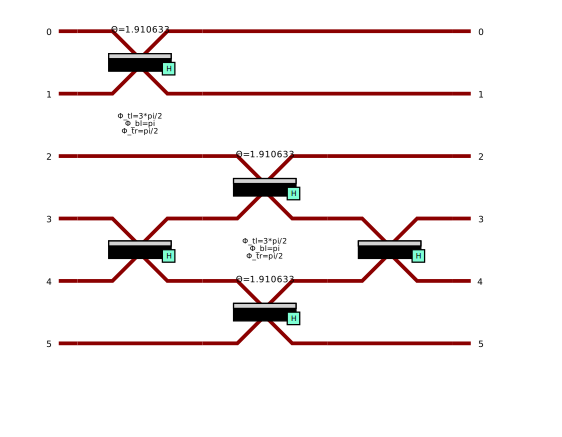

In [6]:
cnot = pcvl.Circuit(6, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())

pcvl.pdisplay(cnot)

### Use processor on HOM

In [7]:
processor = pcvl.Processor("Naive", cnot)
processor.add_herald(0, 0)
processor.add_herald(5, 0)
pcvl.pdisplay(processor, recursive = True)
Pj = ProcessorJitter(bv,processor)
pcvl.pdisplay(Pj.analyser)
states,prob = Pj.print_output()

,"|0,0,0,0>","|0,0,0,1>","|1,0,0,0>","|0,0,1,0>","|0,1,0,0>","|2,0,0,0>","|1,1,0,0>","|1,0,1,0>","|1,0,0,1>","|0,2,0,0>","|0,1,1,0>","|0,1,0,1>","|0,0,0,2>","|0,0,1,1>","|0,0,2,0>"
"|0,0,0,0>",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"|0,0,1,0>",0,0,0,1/2,1/2,0,0,0,0,0,0,0,0,0,0
"|0,1,0,0>",0,1/3,0,1/3,1/3,0,0,0,0,0,0,0,0,0,0
"|0,1,1,0>",0,0,0,0,0,0,0,0,0,1/3,0,1/6,0,1/6,1/3


|2,0,0,0> [0.]
|1,1,0,0> [0.]
|1,0,1,0> [0.]
|1,0,0,1> [0.]
|0,2,0,0> [0.33637322]
|0,1,1,0> [1.24892111e-28]
|0,1,0,1> [0.16818661]
|0,0,0,2> [0.]
|0,0,1,1> [0.16818661]
|0,0,2,0> [0.33637322]
Probabilite totale = 1.009119649870777


In [21]:
prob[5][0]

7.4258059131701925e-28

In [8]:
bs10 = pcvl.BasicState([0,1,1,0])
bs11 = pcvl.BasicState(([0,1,0,1]))
A = dict()
for i,j in zip(states,prob):
    if i == bs10:
        A[i] = j
    elif i == bs11:
        A[i] = j
print(A)

{<perceval.utils.statevector.BasicState object at 0x00000248FA1DAED0>: array([1.24892111e-28]), <perceval.utils.statevector.BasicState object at 0x00000248FA1DAE30>: array([0.16818661])}


In [9]:
normConst = A[bs10] + A[bs11]
A[bs10] /= normConst
A[bs11] /= normConst

for i,j in A.items():
    print(i,j)


|0,1,1,0> [7.42580591e-28]
|0,1,0,1> [1.]


In [40]:
delais = [0.3262157686685896, 8.427415610921344, 16.539841281311965, 23.072866831244028, 38.198807128899716, 58.1518225709533, 78.48797956716226, 94.47494814804486, 120.23891949149129, 139.0909882324122]
gamma = np.array([18092774892.337517, 18029965799.966774, 18105201689.019142, 18026581683.95534, 18081408348.41903, 17977011533.55006, 18206456263.785202, 18129837480.11113, 18020862892.494774, 18047033272.86444])*1e-9
states = ['|1,0,1,0>','|1,0,0,1>','|0,1,1,0>','|0,1,0,1>']
output = np.zeros((len(delais),4,4))
for state in range(len(states)):
    for delai in range(len(delais)):
        source = Source(["Dirac",1],["Exponential",gamma[delai]],temps = [-1,3])
        if state==0 or state==2:
            of0 = np.array([0,0,delais[delai]*1e-3,0])
        else :
            of0 = np.array([0,0,0,delais[delai]*1e-3])
        print(states[state])
        bv = BasicStateJitter(states[state],offset=of0,source=source)
        Pj = ProcessorJitter(bv,processor)
        states1,prob = Pj.print_output()
        normConst = prob[5][0] + prob[6][0]+prob[2][0]+prob[3][0]
        output[delai,state,0],output[delai,state,1], output[delai,state,2],output[delai,state,3]= prob[2][0]/normConst,prob[3][0]/normConst,prob[5][0]/normConst,prob[6][0]/normConst
np.save('output.npy', output)

|1,0,1,0>
|2,0,0,0> [0.]
|1,1,0,0> [0.50114073]
|1,0,1,0> [0.50114073]
|1,0,0,1> [0.]
|0,2,0,0> [0.]
|0,1,1,0> [0.]
|0,1,0,1> [0.]
|0,0,0,2> [0.]
|0,0,1,1> [0.]
|0,0,2,0> [0.]
Probabilite totale = 1.0022814646697058
|1,0,1,0>
|2,0,0,0> [0.]
|1,1,0,0> [0.50204476]
|1,0,1,0> [0.50204476]
|1,0,0,1> [0.]
|0,2,0,0> [0.]
|0,1,1,0> [0.]
|0,1,0,1> [0.]
|0,0,0,2> [0.]
|0,0,1,1> [0.]
|0,0,2,0> [0.]
Probabilite totale = 1.004089513709085
|1,0,1,0>
|2,0,0,0> [0.]
|1,1,0,0> [0.49943851]
|1,0,1,0> [0.49943851]
|1,0,0,1> [0.]
|0,2,0,0> [0.]
|0,1,1,0> [0.]
|0,1,0,1> [0.]
|0,0,0,2> [0.]
|0,0,1,1> [0.]
|0,0,2,0> [0.]
Probabilite totale = 0.9988770161263567
|1,0,1,0>
|2,0,0,0> [0.]
|1,1,0,0> [0.50063427]
|1,0,1,0> [0.50063427]
|1,0,0,1> [0.]
|0,2,0,0> [0.]
|0,1,1,0> [0.]
|0,1,0,1> [0.]
|0,0,0,2> [0.]
|0,0,1,1> [0.]
|0,0,2,0> [0.]
Probabilite totale = 1.0012685448908998
|1,0,1,0>
|2,0,0,0> [0.]
|1,1,0,0> [0.4999525]
|1,0,1,0> [0.4999525]
|1,0,0,1> [0.]
|0,2,0,0> [0.]
|0,1,1,0> [0.]
|0,1,0,1> [0.]
|0,0,0,2

In [39]:
for i in range(10):
    print(output[i,:,:])

[[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         0.01421833 0.98578167]
 [0.         0.         0.98578167 0.01421833]]
[[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         0.21942524 0.78057476]
 [0.         0.         0.78057476 0.21942524]]
[[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         0.34407741 0.65592259]
 [0.         0.         0.65592259 0.34407741]]
[[1.        0.        0.        0.       ]
 [0.        1.        0.        0.       ]
 [0.        0.        0.4060403 0.5939597]
 [0.        0.        0.5939597 0.4060403]]
[[1.        0.        0.        0.       ]
 [0.        1.        0.        0.       ]
 [0.        0.        0.5003117 0.4996883]
 [0.        0.        0.4996883 0.5003117]]
[[1.         0.         0.         0.        ]
 [0.         1.         0.         0.   